In [9]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import os

def plot_feature_score_histograms(
    features,
    inferred_network1,
    inferred_network2,
    label1_name,
    label2_name
):
    print("\tPlotting feature score histograms")
    
    # materialize only needed columns
    if isinstance(inferred_network1, dd.DataFrame):
        print("\tConverting feature columns from Dask to pandas for plotting")
        inferred_network1 = inferred_network1[features].compute()
    if isinstance(inferred_network2, dd.DataFrame):
        inferred_network2 = inferred_network2[features].compute()

    ncols = 4
    nrows = math.ceil(len(features) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows), squeeze=False)

    # flatten axes for easy indexing
    axes_flat = axes.flat

    for ax, feature in zip(axes_flat, features):
        # draw into this axis explicitly:
        sns.histplot(
            inferred_network1[feature].dropna(),
            bins=50, alpha=0.7,
            color='#1682b1', edgecolor="#032b5f",
            stat='proportion',
            label=label1_name,
            ax=ax
        )
        sns.histplot(
            inferred_network2[feature].dropna(),
            bins=50, alpha=0.7,
            color="#cb5f17", edgecolor="#b13301",
            stat='proportion',
            label=label2_name,
            ax=ax
        )

        # set titles/labels on the same ax
        ax.set_title(feature, fontsize=14)
        ax.set_xlabel(feature, fontsize=14)
        ax.set_ylabel("Proportion", fontsize=14)
        ax.set_xlim(0, 1)
        ax.tick_params(axis='both', labelsize=12)

    # turn off any leftover empty subplots
    for ax in axes_flat[len(features):]:
        ax.set_visible(False)

    # figure-level legend
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(
        handles, labels,
        loc="lower center",
        ncol=2,
        fontsize=14,
        bbox_to_anchor=(0.5, -0.02)
    )
    fig.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

In [2]:
def load_and_merge_score_datasets(output_dir):
    peak_to_gene_corr_df = pd.read_parquet(os.path.join(output_dir, "peak_to_gene_correlation.parquet"))
    cicero_score_df = pd.read_parquet(os.path.join(output_dir, "cicero_peak_to_tg_scores.parquet"))

    merged_df = pd.merge(peak_to_gene_corr_df, cicero_score_df, on=["peak_id", "target_id"], how="outer")

    return merged_df

In [3]:
ds011_output_dir = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/output/DS011_mESC/DS011_mESC_sample1"
mesc_output_dir = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/output/mESC/filtered_L2_E7.5_rep2"

In [4]:
ds011_df = load_and_merge_score_datasets(ds011_output_dir)

In [5]:
mesc_df = load_and_merge_score_datasets(mesc_output_dir)

	Plotting feature score histograms


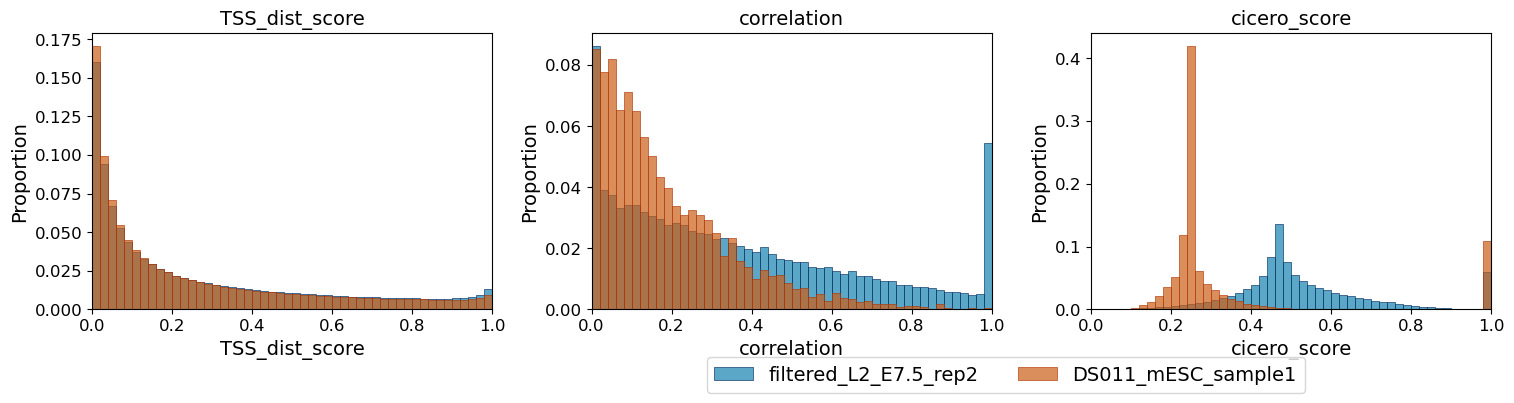

In [11]:
feature_names = ['TSS_dist_score', 'correlation', 'cicero_score']
plot_feature_score_histograms(feature_names, mesc_df, ds011_df, "filtered_L2_E7.5_rep2", "DS011_mESC_sample1")